/Users/yaroslavminenko/PyCharmMiscProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Средняя пенсия в рублях: 13197.91


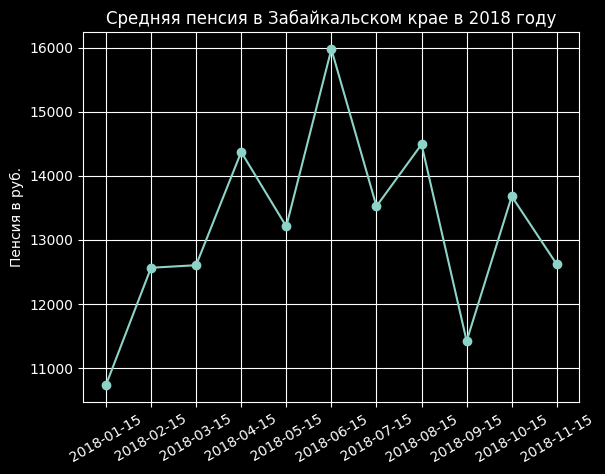

In [1]:
import matplotlib.pyplot as plt
import csv
import requests
import io

m = []
all = []

try:
    res = requests.get("https://raw.githubusercontent.com/odetor/task76-77/main/opendata.stat%20(1).csv")
    res.encoding = "utf-8"

    if  400 <= res.status_code <= 499:
        print(f'Ошибка клиента! Код ошибки: {res.status_code}')
        exit()
    elif 500 <= res.status_code <= 599:
        print(f'Внутреняя ошибка сервера! Код ошибки: {res.status_code}')
        exit()

    #res.raise_for_status()
    content = io.StringIO(res.text)
    reader = csv.DictReader(content)




    #file = open('opendata.stat (1).csv', encoding='utf-8')
    #reader = csv.reader(file)

    for row in reader:
        try:
            if "Средняя пенсия" in row['name'] and row['region'] == "Забайкальский край" and row['date'].startswith('2018'):
                if row['value'].strip() != "":
                    m.append(row['date'])
                    all.append(float(row['value']))
        except ValueError:
            continue
except requests.exceptions.RequestException as e:
    print('Ошибка при выполнения запроса!', e)
    exit()

if not all:
    print('Нет данных')
    exit()


average = sum(all) / len(all)
allr = round(average, 2)

print(f"Средняя пенсия в рублях: {allr}")

plt.plot(m, all, marker = 'o', )
plt.xticks(rotation = 30)
plt.ylabel('Пенсия в руб.')
plt.title('Средняя пенсия в Забайкальском крае в 2018 году')
plt.grid(True)
#plt.waitforbuttonpress
#plt.close()
plt.show()